# Trabalho do Módulo: **Lógica de Programação II**
1. Feito por
2. Carregando os dados
3. Separando conjunto de treino e teste
4. Normalização
5. KNN
6. Parte extra
----
## 1. Feito por
**Grupo 4:**  
Kenzo Inanami  
Gabriel Azevedo  
Sherly Amorim  
Túlio Ribeiro  
Maurício Térreo

**Dataset:** Ataque Cardíaco

## 2. Carregando os dados

In [416]:
import csv

arquivo = open('heart.csv', 'r')

planilha = list(csv.reader(arquivo, delimiter=',', lineterminator='\n'))

for linha in planilha[:6]:
    print(linha)

arquivo.close()

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
['63', '1', '3', '145', '233', '1', '0', '150', '0', '2.3', '0', '0', '1', '1']
['37', '1', '2', '130', '250', '0', '1', '187', '0', '3.5', '0', '0', '2', '1']
['41', '0', '1', '130', '204', '0', '0', '172', '0', '1.4', '2', '0', '2', '1']
['56', '1', '1', '120', '236', '0', '1', '178', '0', '0.8', '2', '0', '2', '1']
['57', '0', '0', '120', '354', '0', '1', '163', '1', '0.6', '2', '0', '2', '1']


Excluindo o cabeçalho e criando uma lista com os valores do cabeçalho

In [417]:
variaveis = planilha.pop(0)

In [418]:
print(variaveis)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


Transformando os dados de str para int ou float:

In [419]:
def int_str(j):
  for i in range(0, len(planilha)):
    planilha[i][j] = int(planilha[i][j])

def flt_str(j):
  for i in range(0, len(planilha)):
    planilha[i][j] = float(planilha[i][j])

for k in [0,1,2,3,4,5,6,7,8,10,11,12,13]:
  int_str(k)

flt_str(9)
# para transformar como tupla
for i in range(len(planilha)):
  planilha[i] = tuple(planilha[i])

for linha in planilha[:6]:
    print(linha)

(63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1, 1)
(37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2, 1)
(41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 1)
(56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1)
(57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2, 1)
(57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1, 1)


## 3. Separar dados de treino e teste

In [420]:
def separar_treino_teste(dados, proporcao_teste=0.2):
    qnt_teste = int(len(dados) * proporcao_teste)

    X_teste = [d[:-1] for d in dados[:qnt_teste//2]]+[d[:-1] for d in dados[-qnt_teste//2:len(dados)]]
    y_teste = [d[-1] for d in dados[:qnt_teste//2]]+[d[-1] for d in dados[-qnt_teste//2:len(dados)]]

    X_treino = [d[:-1] for d in dados[qnt_teste//2:-qnt_teste//2]]
    y_treino = [d[-1] for d in dados[qnt_teste//2:-qnt_teste//2]]

    return X_treino, y_treino, X_teste, y_teste


X_treino, y_treino, X_teste, y_teste = separar_treino_teste(planilha)

In [421]:
print(f'X_treino: {len(X_treino)} tuplas')
print(f'y_treino: {len(y_treino)} tuplas')
print(f'X_teste: {len(X_teste)} tuplas')
print(f'y_teste: {len(y_teste)} tuplas')

X_treino: 243 tuplas
y_treino: 243 tuplas
X_teste: 60 tuplas
y_teste: 60 tuplas


In [422]:
for i in range(5):
    print(X_treino[i])

(41, 0, 1, 105, 198, 0, 1, 168, 0, 0.0, 2, 1, 2)
(65, 1, 0, 120, 177, 0, 1, 140, 0, 0.4, 2, 0, 3)
(44, 1, 1, 130, 219, 0, 0, 188, 0, 0.0, 2, 0, 2)
(54, 1, 2, 125, 273, 0, 0, 152, 0, 0.5, 0, 1, 2)
(51, 1, 3, 125, 213, 0, 0, 125, 1, 1.4, 2, 1, 2)


## 4. Normalização

In [423]:
def normalizar(dados):
    transposta = [[linha[i] for linha in dados] for i in range(len(dados[0]))]
    normalizado = []
    for linha in transposta:
        normalizado.append(list([(x - min(linha))*(1 / (max(linha) - min(linha))) for x in linha]))
    normalizado = [[linha[i] for linha in normalizado] for i in range(len(normalizado[0]))]
    return normalizado

X_treino = normalizar(X_treino)
X_teste = normalizar(X_teste)

In [424]:
for i in range(5):
    print(X_treino[i])

[0.25, 0.0, 0.3333333333333333, 0.10377358490566037, 0.1643835616438356, 0.0, 0.5, 0.7404580152671756, 0.0, 0.0, 1.0, 0.25, 0.6666666666666666]
[0.75, 1.0, 0.0, 0.24528301886792453, 0.11643835616438356, 0.0, 0.5, 0.5267175572519084, 0.0, 0.06451612903225806, 1.0, 0.0, 1.0]
[0.3125, 1.0, 0.3333333333333333, 0.33962264150943394, 0.21232876712328766, 0.0, 0.0, 0.8931297709923663, 0.0, 0.0, 1.0, 0.0, 0.6666666666666666]
[0.5208333333333333, 1.0, 0.6666666666666666, 0.29245283018867924, 0.3356164383561644, 0.0, 0.0, 0.6183206106870229, 0.0, 0.08064516129032258, 0.0, 0.25, 0.6666666666666666]
[0.4583333333333333, 1.0, 1.0, 0.29245283018867924, 0.19863013698630136, 0.0, 0.0, 0.41221374045801523, 1.0, 0.2258064516129032, 1.0, 0.25, 0.6666666666666666]


## 5. KNN

In [425]:
class KNN:
    def __init__(self, k_vizinhos = 1, distancia = 'euclidiana'):
        self.k_vizinhos = k_vizinhos

        self.X_treino = []
        self.y_treino = []

        if distancia.lower() == 'euclidiana':
            self.__distancia = self.__euclidiana
        elif distancia.lower() == 'manhattan':
            self.__distancia = self.__manhattan
        elif distancia.lower() == 'cosseno':
            self.__distancia = self.__cosseno
        else:
            raise Exception('Parâmetro "distancia" inválido! Ele deve ser "euclidiana", "manhattan" ou "cosseno"')

    def treino(self, X_treino, y_treino):
        if len(X_treino) != len(y_treino):
            raise Exception('Tamanho de X_treino e y_treino diferentes!')
        self.X_treino = X_treino
        self.y_treino = y_treino

    def teste(self, X_teste, y_teste):
        if len(X_treino) == 0:
            raise Exception('X_treino e y_treino não definidos!')

        n = self.k_vizinhos
        k = [] # indexes dos vizinhos mais proximos
        estimativa = [] # previsão do algoritmo
        for i in range(0, len(y_teste)):
            vd = self.__distancia(X_teste[i])

            k = [1 for j in range(n)] # para inicializar a lista

            for j in range(0, n):
                k[j] = vd.index(min(vd))
                vd[k[j]] = max(vd)

            # Coletando os rótulos dos vizinhos mais próximos
            resultados = []
            for j in range(0, n):
                resultados.append(y_treino[k[j]])

            if sum(resultados) > (len(resultados)/2):
                estimativa.append(1)
            elif sum(resultados) < (len(resultados)/2):
                estimativa.append(0)
            else:
                estimativa.append(y_treino[k[0]])

        acertos = 0
        for i in range(0, len(y_teste)):
            if estimativa[i] == y_teste[i]:
                acertos += 1
        acuracia = acertos / len(y_teste)

        matriz = self.__matriz_confusao(y_teste, estimativa)

        return acuracia, matriz

    def classificar(self, X_teste):
        if len(X_treino) == 0:
            raise Exception('X_treino e y_treino não definidos!')

        n = self.k_vizinhos
        k = [] # indexes dos vizinhos mais proximos
        estimativa = [] # previsão do algoritmo
        for i in range(0, len(X_teste)):
            vd = self.__distancia(X_teste[i])

            k = [1 for j in range(n)] # para inicializar a lista
            vk = []
            for j in range(0, n):
                k[j] = vd.index(min(vd))
                vd[k[j]] = max(vd)

            # Coletando os rótulos dos vizinhos mais próximos
            resultados = []
            for j in range(0, n):
                resultados.append(self.y_treino[k[j]])
            if sum(resultados) > (len(resultados)/2):
                estimativa.append(1)
            elif sum(resultados) < (len(resultados)/2):
                estimativa.append(0)
            else:
                estimativa.append(y_treino[k[0]])

        return estimativa

    def __matriz_confusao(self, y_teste, estimativa):
        verdadeiro_positivo = sum([1 for i in range(len(y_teste)) if y_teste[i] == 1 and estimativa[i] == 1])
        verdadeiro_negativo = sum([1 for i in range(len(y_teste)) if y_teste[i] == 0 and estimativa[i] == 0])
        falso_positivo = sum([1 for i in range(len(y_teste)) if y_teste[i] == 0 and estimativa[i] == 1])
        falso_negativo = sum([1 for i in range(len(y_teste)) if y_teste[i] == 1 and estimativa[i] == 0])

        return [[verdadeiro_positivo, falso_negativo], [falso_positivo, verdadeiro_negativo]]

    def __euclidiana(self, elemento):
        vd = [(sum((self.X_treino[i][j] - elemento[j])**2 for j in range(len(self.X_treino[0]))))**(1/2) for i in range(len(self.X_treino))]
        return vd

    def __manhattan(self, elemento):
        vd = [(sum(abs(self.X_treino[i][j] - elemento[j]) for j in range(len(self.X_treino[0]))))**(1/2) for i in range(len(self.X_treino))]
        return vd

    def __cosseno(self,elemento):
        vd = []
        for i in range(len(self.X_treino)):
            produto = sum(self.X_treino[i][j] * elemento[j] for j in range(len(self.X_treino[0])))
            norm_a = sum(self.X_treino[i][j]**2 for j in range(len(self.X_treino[0])))**(1/2)
            norm_b = sum(elemento[j]**2 for j in range(len(elemento)))**(1/2)
            similaridade_cos = produto / (norm_a * norm_b)
            vd.append(similaridade_cos)
        return vd



In [426]:
for i in range(1, 50, 2):
    knn = KNN(i)
    vd = knn.treino(X_treino,y_treino)
    taxa,matriz = knn.teste(X_teste,y_teste)
    print(f'K: {i} | taxa: {taxa}')

K: 1 | taxa: 0.7166666666666667
K: 3 | taxa: 0.7333333333333333
K: 5 | taxa: 0.8
K: 7 | taxa: 0.7666666666666667
K: 9 | taxa: 0.7833333333333333
K: 11 | taxa: 0.7833333333333333
K: 13 | taxa: 0.7333333333333333
K: 15 | taxa: 0.7333333333333333
K: 17 | taxa: 0.7333333333333333
K: 19 | taxa: 0.75
K: 21 | taxa: 0.7333333333333333
K: 23 | taxa: 0.7666666666666667
K: 25 | taxa: 0.7666666666666667
K: 27 | taxa: 0.7666666666666667
K: 29 | taxa: 0.7666666666666667
K: 31 | taxa: 0.7666666666666667
K: 33 | taxa: 0.7666666666666667
K: 35 | taxa: 0.7666666666666667
K: 37 | taxa: 0.7666666666666667
K: 39 | taxa: 0.75
K: 41 | taxa: 0.75
K: 43 | taxa: 0.75
K: 45 | taxa: 0.7333333333333333
K: 47 | taxa: 0.75
K: 49 | taxa: 0.75


In [427]:
knn = KNN(5)

vd = knn.treino(X_treino,y_treino)
acuracia, matriz = knn.teste(X_teste,y_teste)
print(f'Matriz:\n{matriz[0][0]}     {matriz[0][1]}\n{matriz[1][0]}      {matriz[1][1]}')

Matriz:
27     3
9      21


## 6. Parte extra

A partir desse espaço tomamos liberdade de usar bibliotecas para ajudar na análise de dados.

In [103]:
X_treino_age_trbps = [[X_treino[i][0],X_treino[i][3]] for i in range(len(X_treino))]
X_teste_age_trbps = [[X_teste[i][0],X_teste[i][3]] for i in range(len(X_teste))]



In [104]:
X_treino_age_trbps_0 = [X_treino_age_trbps[i] for i in range(len(X_treino)) if y_treino[i] == 0]
X_treino_age_trbps_1 = [X_treino_age_trbps[i] for i in range(len(X_treino)) if y_treino[i] == 1]
X_treino_age_trbps_0 = [[linha[i] for linha in X_treino_age_trbps_0] for i in range(len(X_treino_age_trbps_0[0]))]
X_treino_age_trbps_1 = [[linha[i] for linha in X_treino_age_trbps_1] for i in range(len(X_treino_age_trbps_1[0]))]


X_teste_age_trbps_0 = [X_teste_age_trbps[i] for i in range(len(X_teste)) if y_teste[i] == 0]
X_teste_age_trbps_1 = [X_teste_age_trbps[i] for i in range(len(X_teste)) if y_teste[i] == 1]
X_teste_age_trbps_0 = [[linha[i] for linha in X_teste_age_trbps_0] for i in range(len(X_teste_age_trbps_0[0]))]
X_teste_age_trbps_1 = [[linha[i] for linha in X_teste_age_trbps_1] for i in range(len(X_teste_age_trbps_1[0]))]


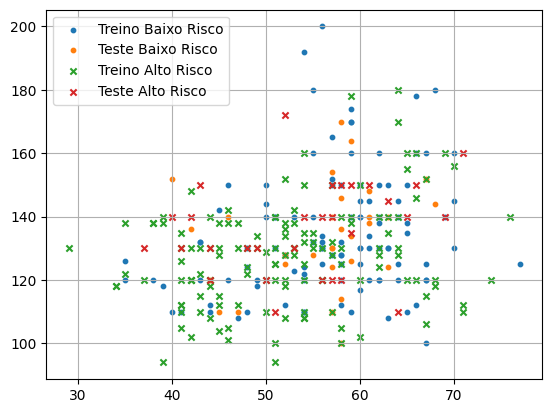

In [106]:
#cor1=pltcor(estimativa)
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax1.scatter(X_treino_age_trbps_0[0], X_treino_age_trbps_0[1], marker='o', s=10, label='Treino Baixo Risco')
ax1.scatter(X_teste_age_trbps_0[0], X_teste_age_trbps_0[1], marker='o', s=10, label='Teste Baixo Risco')
ax1.scatter(X_treino_age_trbps_1[0], X_treino_age_trbps_1[1], marker='x', s=20,label='Treino Alto Risco')
ax1.scatter(X_teste_age_trbps_1[0], X_teste_age_trbps_1[1], marker='x', s=20,label='Teste Alto Risco')


ax1.legend()

### Heatmap dos atributos

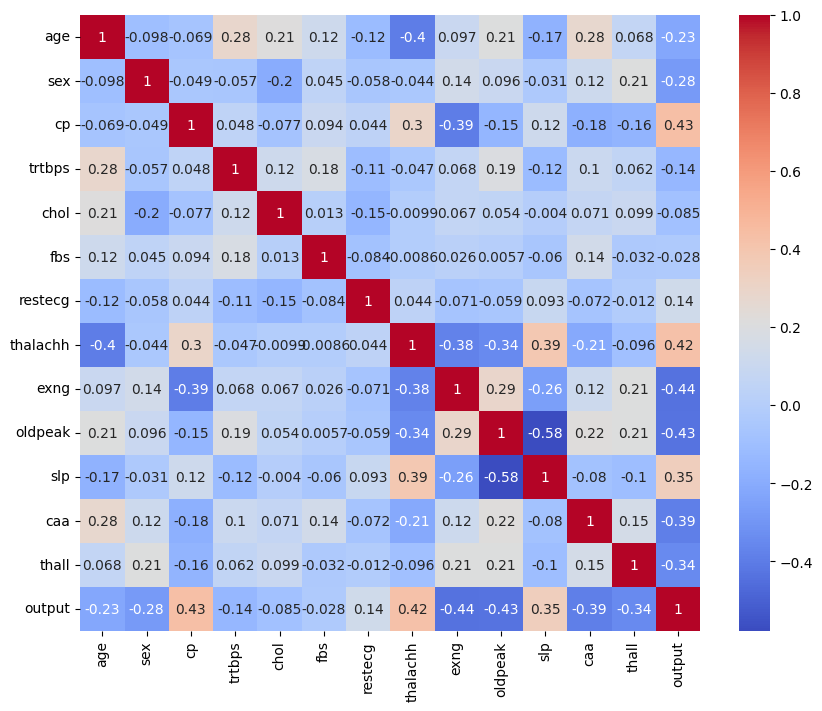

In [428]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(planilha, columns=variaveis)

df = df.apply(pd.to_numeric)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


A partir da análise do heatmap, não é possível aferir uma colinearidade entre as variáveis(multicolinearidade não foi averiguada). Porém é possível observar que 'chol', 'trtbps', 'fbs', 'age' e 'sex' são os que possuem menor correlação com o rótulo. A partir de experimentos, nosso melhor resultado foi obtido a partir da exclusão das colunas 'trtbps','fbs' e 'restecg'.

In [429]:
df_novo = df.drop(columns=['trtbps','fbs','restecg'])

In [430]:
dados = df_novo.values.tolist()


X_treino, y_treino, X_teste, y_teste = separar_treino_teste(dados)
X_treino = normalizar(X_treino)
X_teste = normalizar(X_teste)

In [431]:
for i in range(1, 50, 2):
    knn = KNN(i)
    knn.treino(X_treino,y_treino)
    taxa,matriz = knn.teste(X_teste,y_teste)
    print(f'K: {i} | taxa: {taxa}')

K: 1 | taxa: 0.7333333333333333
K: 3 | taxa: 0.7833333333333333
K: 5 | taxa: 0.8166666666666667
K: 7 | taxa: 0.7833333333333333
K: 9 | taxa: 0.8333333333333334
K: 11 | taxa: 0.8166666666666667
K: 13 | taxa: 0.8
K: 15 | taxa: 0.8
K: 17 | taxa: 0.8
K: 19 | taxa: 0.7833333333333333
K: 21 | taxa: 0.75
K: 23 | taxa: 0.7833333333333333
K: 25 | taxa: 0.7666666666666667
K: 27 | taxa: 0.75
K: 29 | taxa: 0.7666666666666667
K: 31 | taxa: 0.75
K: 33 | taxa: 0.7333333333333333
K: 35 | taxa: 0.7166666666666667
K: 37 | taxa: 0.7166666666666667
K: 39 | taxa: 0.7333333333333333
K: 41 | taxa: 0.7666666666666667
K: 43 | taxa: 0.7666666666666667
K: 45 | taxa: 0.7666666666666667
K: 47 | taxa: 0.7666666666666667
K: 49 | taxa: 0.75


In [432]:
knn = KNN(9)
knn.treino(X_treino,y_treino)
taxa,matriz = knn.teste(X_teste,y_teste)
print(f'Matriz:\n{matriz[0][0]}     {matriz[0][1]}\n{matriz[1][0]}      {matriz[1][1]}')

Matriz:
27     3
7      23


### Outliers

#### Visualização

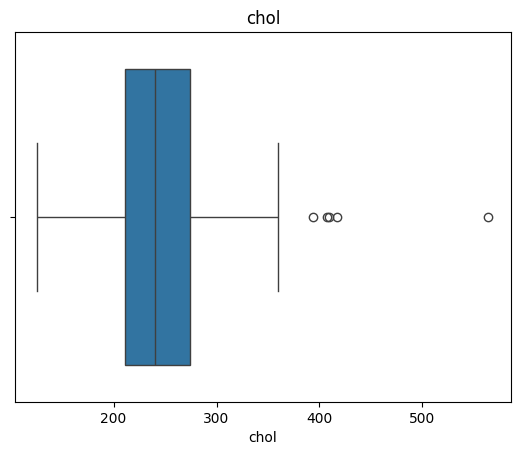

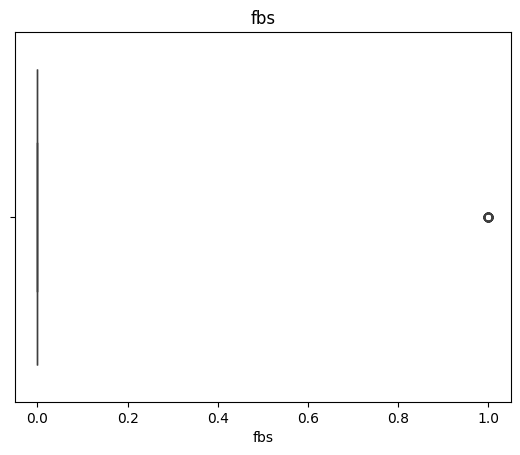

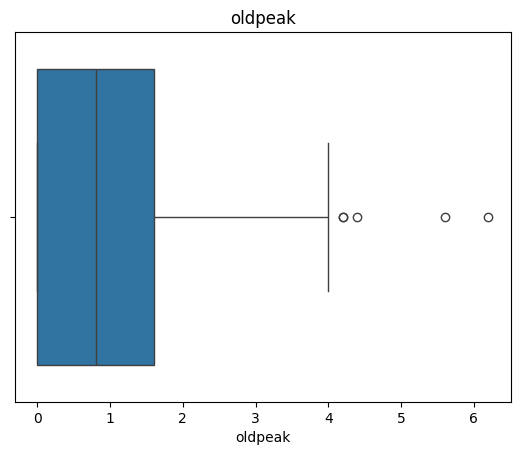

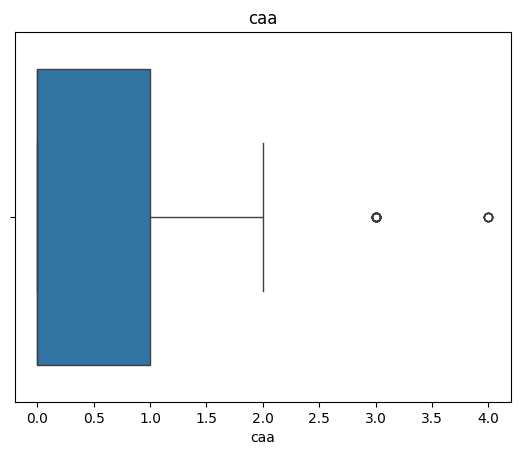

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt

for coluna in ['chol','fbs','oldpeak', 'caa']:
    plt.figure()
    sns.boxplot(x=df[coluna])
    plt.title(coluna)
    plt.show()


Pela pouca quantidade de dados, foi pensado que a melhor alternativa seria substituir os valores outliers pelos valores limites superiores ou inferiores.

In [433]:
import numpy as np

for coluna in df.columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])


In [434]:
df_novo_sem_outlier = df.drop(columns=['trtbps','fbs','restecg'])

In [435]:
dados = df_novo_sem_outlier.values.tolist()

X_treino, y_treino, X_teste, y_teste = separar_treino_teste(dados)
X_treino = normalizar(X_treino)
X_teste = normalizar(X_teste)

In [436]:
for i in range(1, 50,2):
    knn = KNN(i)
    knn.treino(X_treino,y_treino)
    taxa,matriz = knn.teste(X_teste,y_teste)
    print(f'K: {i} | taxa: {taxa}')

K: 1 | taxa: 0.75
K: 3 | taxa: 0.7833333333333333
K: 5 | taxa: 0.8166666666666667
K: 7 | taxa: 0.85
K: 9 | taxa: 0.8
K: 11 | taxa: 0.8666666666666667
K: 13 | taxa: 0.7833333333333333
K: 15 | taxa: 0.7666666666666667
K: 17 | taxa: 0.7833333333333333
K: 19 | taxa: 0.7833333333333333
K: 21 | taxa: 0.7666666666666667
K: 23 | taxa: 0.7833333333333333
K: 25 | taxa: 0.7666666666666667
K: 27 | taxa: 0.7833333333333333
K: 29 | taxa: 0.75
K: 31 | taxa: 0.7666666666666667
K: 33 | taxa: 0.7666666666666667
K: 35 | taxa: 0.7666666666666667
K: 37 | taxa: 0.75
K: 39 | taxa: 0.75
K: 41 | taxa: 0.75
K: 43 | taxa: 0.75
K: 45 | taxa: 0.75
K: 47 | taxa: 0.75
K: 49 | taxa: 0.75


In [437]:
knn = KNN(11)
knn.treino(X_treino,y_treino)
taxa,matriz = knn.teste(X_teste,y_teste)
print(f'Matriz:\n{matriz[0][0]}     {matriz[0][1]}\n{matriz[1][0]}      {matriz[1][1]}')

Matriz:
30     0
8      22


Conseguimos melhorar o modelo até a acurácia máxima de aproximadamente 86%, nosso maior problema com ele é a quantidade de valores falso positivos, ou seja, está marcando que pessoas sem risco de doenças cardiacas possuem alto risco.